In [164]:
!pip install textblob
import textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
import tweepy as tw
from textblob import TextBlob
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

In [167]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [168]:
public_tweets = api.search('eBay Love Island', count=400)

In [169]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in public_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])


 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('eBayLoveIslan3_data.csv')


In [ ]:
tweet_dataset.head(50)

In [171]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [172]:
tweet_dataset['text']=tweet_dataset['text'].apply(cleanUpTweet)
#20, 26, 48 and codes found https://www.youtube.com/watch?v=z4ff5veeCVY&t=2037s

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity


In [ ]:
tweet_dataset['Subjectivity']=tweet_dataset['text'].apply(getTextSubjectivity)
tweet_dataset['Polarity']=tweet_dataset['text'].apply(getTextPolarity) #polarity<0 = -ve sentiment, =0 =neutral and >0 = +ve
tweet_dataset.head(50)

In [177]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
tweet_dataset["Score"]=tweet_dataset['Polarity'].apply(getTextAnalysis)
tweet_dataset.head(50)

In [179]:
positive=tweet_dataset[tweet_dataset['Score']=="Positive"]
print(str(positive.shape[0]/(tweet_dataset.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/tweet_dataset.shape[0]*100


64.0% of Positive tweets


In [180]:
negative=tweet_dataset[tweet_dataset['Score']=="Negative"]
print(str(negative.shape[0]/(tweet_dataset.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/tweet_dataset.shape[0]*100


10.0% of Negative tweets


In [181]:
neutral=tweet_dataset[tweet_dataset['Score']=="Neutral"]
print(str(neutral.shape[0]/(tweet_dataset.shape[0])*100)+"% of Neutral tweets")
neu=neutral.shape[0]/tweet_dataset.shape[0]*100


26.0% of Neutral tweets


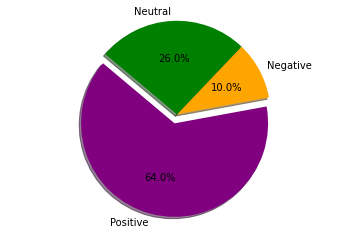

In [187]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [64, 10.0, 26]
colors = ['purple', 'orange', 'green']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [188]:
from google.colab import files
files.download("eBayLoveIslan3_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>